<a href="https://colab.research.google.com/github/AEYSHA-AZAM/Data_Zenix_Project_9/blob/main/Autocomplete_and_Autocorrect_Data_Analytics_Using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# ✅ Step 1: Install and Import – DO THIS FIRST
!pip install --quiet textblob matplotlib seaborn pandas

import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter


In [68]:
# ✅ Step 2: Clean and Tokenize without NLTK or TextBlob

# 1. Sample input
text_data = """
Natural language processing is the foundation of smart applications like autocomplete and autocorrect.
Autocomplete helps predict the next word as you type.
Autocorrect fixes spelling errors automatically.
These features greatly improve the user experience in writing apps, search engines, and messaging.
"""

# 2. Clean the text (lowercase + remove punctuation)
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    return text

# 3. Apply cleaning
cleaned_text = clean_text(text_data)

# 4. Tokenize manually (split by spaces)
tokens = cleaned_text.split()

# 5. Show output
print("Cleaned Text:\n", cleaned_text)
print("\nTotal Tokens:", len(tokens))
print("Sample Tokens:", tokens[:15])


Cleaned Text:
 
natural language processing is the foundation of smart applications like autocomplete and autocorrect
autocomplete helps predict the next word as you type
autocorrect fixes spelling errors automatically
these features greatly improve the user experience in writing apps search engines and messaging


Total Tokens: 41
Sample Tokens: ['natural', 'language', 'processing', 'is', 'the', 'foundation', 'of', 'smart', 'applications', 'like', 'autocomplete', 'and', 'autocorrect', 'autocomplete', 'helps']


In [69]:
# ✅ Step 3: Autocorrect Example
def autocorrect_text(text):
    corrected = TextBlob(text).correct()
    return str(corrected)

test_sentences = [
    "Autocorect is improtant",
    "Langauge is powrful",
    "Experance is smoth"
]

for s in test_sentences:
    print("Original :", s)
    print("Corrected:", autocorrect_text(s), "\n")


Original : Autocorect is improtant
Corrected: Autocorect is important 

Original : Langauge is powrful
Corrected: Language is powerful 

Original : Experance is smoth
Corrected: Experance is smooth 



In [70]:
# ✅ Step 4: Autocomplete using bigram
def build_bigram_model(tokens):
    bigrams = list(zip(tokens[:-1], tokens[1:]))
    return Counter(bigrams)

bigram_model = build_bigram_model(tokens)

def autocomplete(word, model):
    suggestions = [w2 for (w1, w2) in model if w1 == word]
    return list(set(suggestions))[:3]

print("Autocomplete for 'user':", autocomplete("user", bigram_model))
print("Autocomplete for 'autocomplete':", autocomplete("autocomplete", bigram_model))


Autocomplete for 'user': ['experience']
Autocomplete for 'autocomplete': ['and', 'helps']


/tmp/ipython-input-585106775.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette="Blues_d")


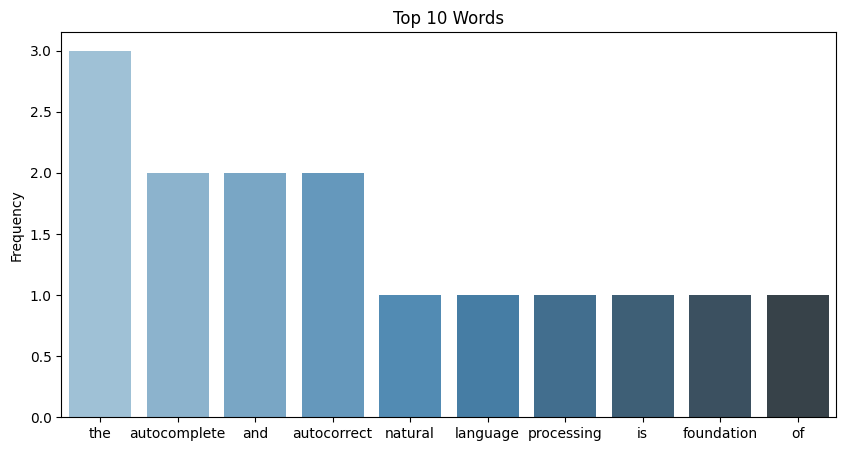

In [71]:
# ✅ Step 5: Frequency Plot
word_counts = Counter(tokens)
top_words = word_counts.most_common(10)

words, freqs = zip(*top_words)
plt.figure(figsize=(10,5))
sns.barplot(x=list(words), y=list(freqs), palette="Blues_d")
plt.title("Top 10 Words")
plt.ylabel("Frequency")
plt.show()


In [72]:
# ✅ Step 6: Simulated Accuracy
y_true = ['experience', 'helps', 'predicts']
y_pred = ['experance', 'helps', 'predicts']

def accuracy(y_true, y_pred):
    return round(sum(1 for a, b in zip(y_true, y_pred) if a == b) / len(y_true), 2)

print("Simulated Accuracy:", accuracy(y_true, y_pred))


Simulated Accuracy: 0.67


/tmp/ipython-input-1282792241.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feedback, x='Feature', y='Satisfaction (out of 5)', palette="Purples")


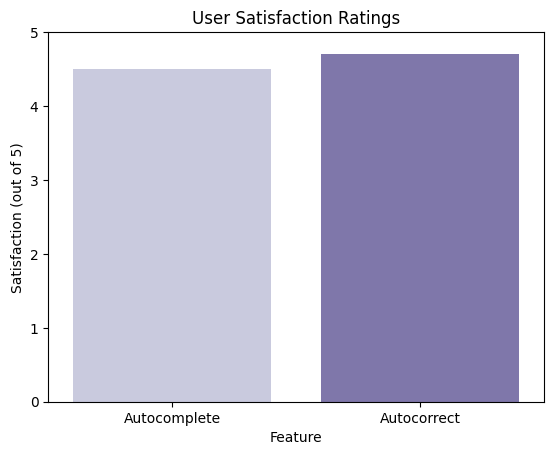

In [73]:
# ✅ Step 7: Feedback Bar Chart
feedback = pd.DataFrame({
    'Feature': ['Autocomplete', 'Autocorrect'],
    'Satisfaction (out of 5)': [4.5, 4.7]
})

sns.barplot(data=feedback, x='Feature', y='Satisfaction (out of 5)', palette="Purples")
plt.title("User Satisfaction Ratings")
plt.ylim(0, 5)
plt.show()


In [74]:
# ✅ Step 8: Export word frequency to CSV
df = pd.DataFrame(top_words, columns=["Word", "Frequency"])
df.to_csv("word_frequency.csv", index=False)

from google.colab import files
files.download("word_frequency.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>